In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Question 2.1
What do you expect to happen if an IF neuron is fed a very low input current?  An LIF neuron?

**Answer**: Since IF neuron models do not leak out the inputs over time, even a very low input current can accumulate voltage over a very long time to reach the threshold and spike. The LIF model would not spike because it integrates a leak which prevents the low input current from accumulating and reaching the threshold.

### Question 2.2
What do you expect to happen if an IF neuron is fed a larger input current?  An LIF neuron?

**Answer**: When fed with larger input currents IF and LIF would look pretty similar, both would spike when reaching the threshold, then reset to its resting potential, and the models would continue to run until the input ends. Depending on the input amplitude, it is possible that the IF model would spike sooner than the LIF model because there is no leak.

### Question 2.3
What are the limitations of an LIF neuron?

**Answer**: Each time a LIF model spikes, its membrane potential is immediately reset. When the HH model receives a large input current over a period of time, consecutive spikes would become slightly smaller since the ion concentrations have not fully rebalanced. Since LIF has no memory of the previous spikes, all its spikes would look the same. Some of the shortcomings of LIF include a lack of a capacity to adapt, chances in conduction following spikes, and the presence of shunting inhibition, all of which can hinder the accuracy of the model.

### Question 3.1
Simulate an LIF neuron with different input currents and plot the membrane potential, showing (a) potential decay over time and (b) spiking behavior.

**Model**

In [2]:
def LIF(I, Cm, Rm):
    """
    Runs a LIF simulation on neuron and returns outputted voltage

            Parameters:
                    I (double[]): A list of input voltages in mV
                    Cm (double): The membrane capacitance
                    Rm (double): The membrane resistance

            Returns:
                    V (double[]): A list of the output voltages in mV
    """
    V_thresh = 30
    V_rest = -65
    V_spike = 80
    dT = 0.02  # time step in ms
    total_time = (I.size) * dT

    # an array of time
    time = np.arange(0, total_time, dT)

    # default voltage list set to resting volatage of -65mV
    V = (-65) * np.ones(len(time))

    did_spike = False

    # function member variable to track spikes
    LIF.spikes = 0

    for t in range(len(time)):
        # using "I - V(t)/Rm = Cm * dV/dT"
        dV = (I[t] - (V[t - 1] - V_rest) / Rm) / Cm

        # reset membrane potential if neuron spiked last tick
        if did_spike:
            V[t] = V_rest + dV * dT
        else:
            V[t] = V[t - 1] + dV * dT

        # check if membrane voltage exceeded threshold (spike)
        if V[t] > V_thresh:
            did_spike = True
            # set the last step to spike value
            V[t] = V_spike
            LIF.spikes += 1
        else:
            did_spike = False

    return V


**Potential decay over time**

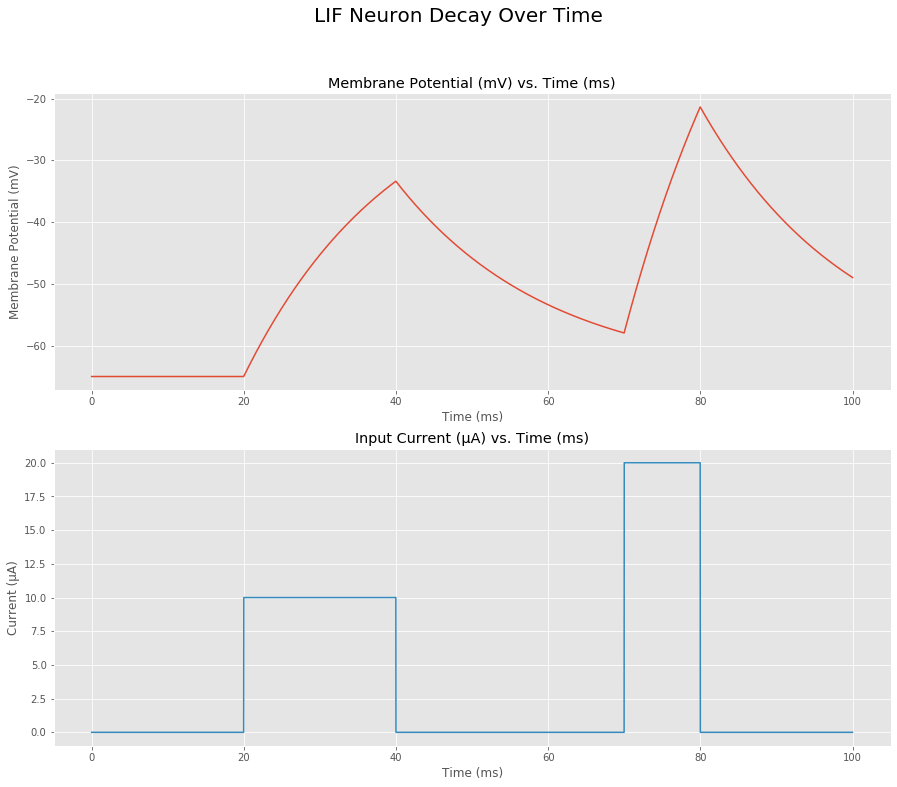

In [3]:
total_time = 100
dT = 0.02
time = np.arange(0, total_time + dT, dT)

# input current initially at 0µA
I = np.zeros(len(time))

# 10µA from 20ms - 40ms
I[1000:2000] = 10

# 20µA from 70ms - 80ms
I[3500:4000] = 20

# output voltage from LIF model
V = LIF(I=I, Cm=4, Rm=5)

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))
fig.suptitle("LIF Neuron Decay Over Time", fontsize=20)

ax1.plot(time, V, label="Membrane Potential")
ax1.set_title("Membrane Potential (mV) vs. Time (ms)")
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xlabel("Time (ms)")

ax2.plot(time, I, "C1", label="Input Current")
ax2.set_title("Input Current (µA) vs. Time (ms)")
ax2.set_ylabel("Current (µA)")
ax2.set_xlabel("Time (ms)")

plt.show()


**Spiking behavior**

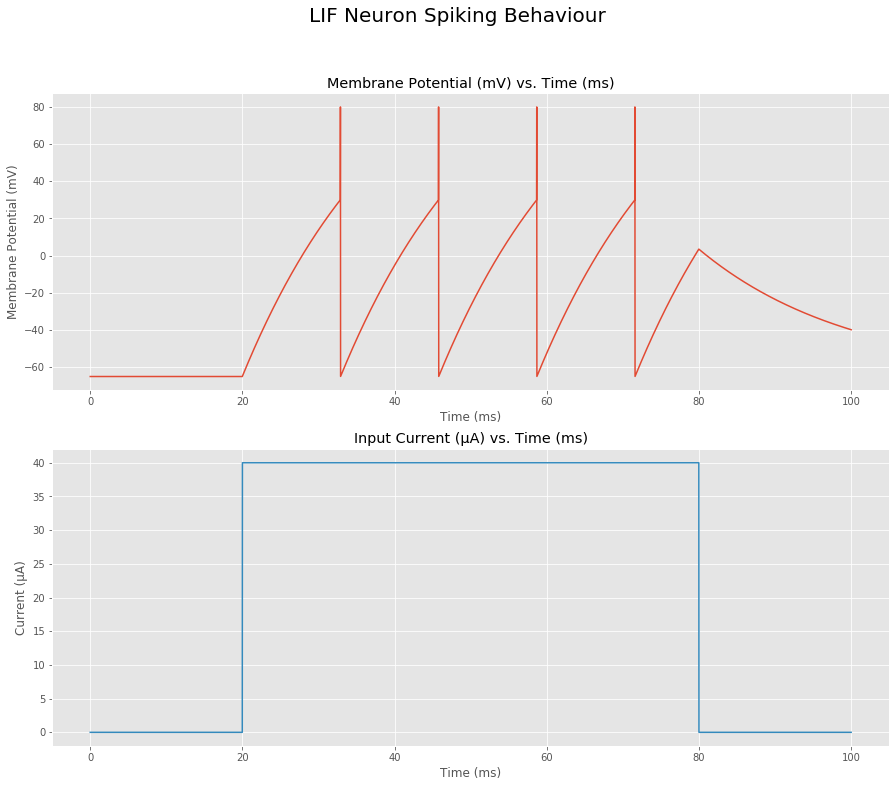

In [4]:
# input current array
total_time = 100
dT = 0.02
time = np.arange(0, total_time + dT, dT)

# input current initially at 0µA
I = np.zeros(len(time))

# 40µA from 20ms - 80ms
I[1000:4000] = 40

# output voltage from LIF model
V = LIF(I=I, Cm=4, Rm=5)

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))
fig.suptitle("LIF Neuron Spiking Behaviour", fontsize=20)

ax1.plot(time, V, label="Membrane Potential")
ax1.set_title("Membrane Potential (mV) vs. Time (ms)")
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xlabel("Time (ms)")

ax2.plot(time, I, "C1", label="Input Current")
ax2.set_title("Input Current (µA) vs. Time (ms)")
ax2.set_ylabel("Current (µA)")
ax2.set_xlabel("Time (ms)")

plt.show()


### Question 3.2
Plot the firing rate as a function of the input current.

Text(0, 0.5, 'Spike Rate (Hz)')

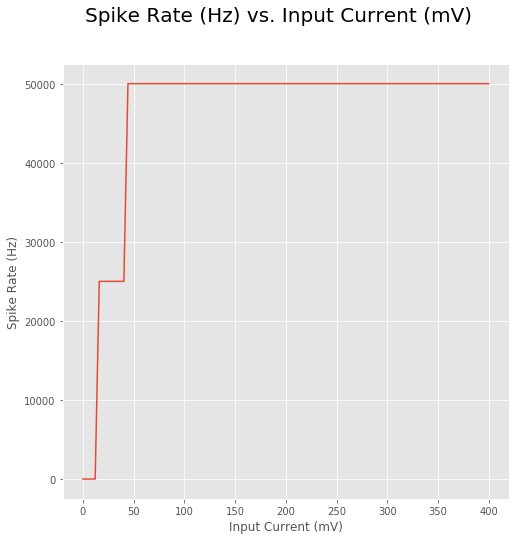

In [5]:
# total time (ms)
T = 100
# step interval (ms)
dT = 0.02

I_max = 400
I_num = 100

# 20ms
T_input_start = 20 * 50
# 80ms
T_input_end = 80 * 50

# input current increases from 0mA to 400mA in 4mA intervals
input_current = np.linspace(0, I_max, I_num)

spike_rate = np.empty(input_current.size)


for i in range(input_current.size):
    """calculate spike rate for each iteration"""
    time = np.arange(0, T + dT, dT)

    # from 20ms to 80ms the input voltage spikes to input_current[i]
    I = np.zeros(len(time))
    I[T_input_start:T_input_end] = input_current[i]

    # run LIF simulation
    LIF(I=I, Cm=0.003, Rm=5)

    # calculate the spike rate during the 20ms to 80ms period
    spike_rate[i] = LIF.spikes / (time[T_input_end] - time[T_input_start]) * 1000

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Spike Rate (Hz) vs. Input Current (mV)", fontsize=20)

plt.plot(input_current, spike_rate)
plt.xlabel("Input Current (mV)")
plt.ylabel("Spike Rate (Hz)")


### Question 3.3
**Question**: What happens to the firing rate as you continue to increase the input current?  Why?

**Answer**: Generally speaking, input current and firing rate increase proportionally since the charge is able to reach the spiking threshold faster. At a certain point the input current will become so powerful that it fills the threshold immediately causing a spike. The cell then drops back to its resting potential after which it immediately spikes again. Therefore, the firing rate will be capped at a certain value - in our case 50000Hz, for any input greater or equal to approximately 58mV.